<a href="https://colab.research.google.com/github/akshitrajpatel/decisiontreealgorithm/blob/master/decisiontreealgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q3. (To Explore Decision Tree Algorithm )
For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is
if we feed any new data to this classifier, it would be able to predict the right class accordingly.

In [ ]:
!pip install pandas-bokeh

     |████████████████████████████████| 19.3MB 1.2MB/s 
     |████████████████████████████████| 501kB 46.9MB/s 
  Created wheel for bokeh: filename=bokeh-2.1.1-cp36-none-any.whl size=9257189 sha256=930cb275d0ffc98215604521bfc04c30851e1a1666c2beae4f6cb8470a84ab20
  Stored in directory: /root/.cache/pip/wheels/be/22/78/21314fd130a51b17e546e8743780ec61f2a52cfd5b851a2800
  Created wheel for tornado: filename=tornado-6.0.4-cp36-cp36m-linux_x86_64.whl size=427627 sha256=aae28942ae312cffec7afa8059614b8d2c4ea78b3c31e78b07ed4283a09473b7
  Stored in directory: /root/.cache/pip/wheels/93/84/2f/409c7b2bb3afc3aa727f7ee8787975e0793f74d1165f4d0104
Successfully built bokeh tornado
  Found existing installation: tornado 4.5.3
    Uninstalling tornado-4.5.3:
      Successfully uninstalled tornado-4.5.3
  Found existing installation: bokeh 1.4.0
    Uninstalling bokeh-1.4.0:
      Successfully uninstalled bokeh-1.4.0


In [ ]:
import numpy as np
import pandas as pd

import pandas_bokeh
import seaborn as sns
import matplotlib.pyplot as plt
pandas_bokeh.output_notebook()
#pd.set_option('plotting.backend', 'pandas_bokeh')
# Create Bokeh-Table with DataFrame:
from bokeh.models.widgets import DataTable, TableColumn
from bokeh.models import ColumnDataSource


# Import the needed matplotlib functionality for scatter plot visualization.
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import load_iris
# Import the model and an additional visualization tool.
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix




/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Load the iris dataset from scikit-learn (note the use of from [library] import [function] above)
iris = load_iris()


X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Categorical.from_codes(iris.target, iris.target_names)
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])
print(data1)


     sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                  5.1               3.5  ...               0.2     0.0
1                  4.9               3.0  ...               0.2     0.0
2                  4.7               3.2  ...               0.2     0.0
3                  4.6               3.1  ...               0.2     0.0
4                  5.0               3.6  ...               0.2     0.0
..                 ...               ...  ...               ...     ...
145                6.7               3.0  ...               2.3     2.0
146                6.3               2.5  ...               1.9     2.0
147                6.5               3.0  ...               2.0     2.0
148                6.2               3.4  ...               2.3     2.0
149                5.9               3.0  ...               1.8     2.0

[150 rows x 5 columns]


In [ ]:
data1.plot_bokeh.bar(xlabel="petal_length",ylabel="sepal_width",alpha=0.6,figsize=(2000,800),title="petal_length Vs Sepal_length",category="species",stacked=True)

Figure(id='1233', ...)

We know that Decision trees can handle categorical data, we still encode the targets in terms of digits (i.e. setosa=0, versicolor=1, virginica=2) in order to create a confusion matrix at a later point👇

In [ ]:
y = pd.get_dummies(y)
print(y)

     setosa  versicolor  virginica
0         1           0          0
1         1           0          0
2         1           0          0
3         1           0          0
4         1           0          0
..      ...         ...        ...
145       0           0          1
146       0           0          1
147       0           0          1
148       0           0          1
149       0           0          1

[150 rows x 3 columns]


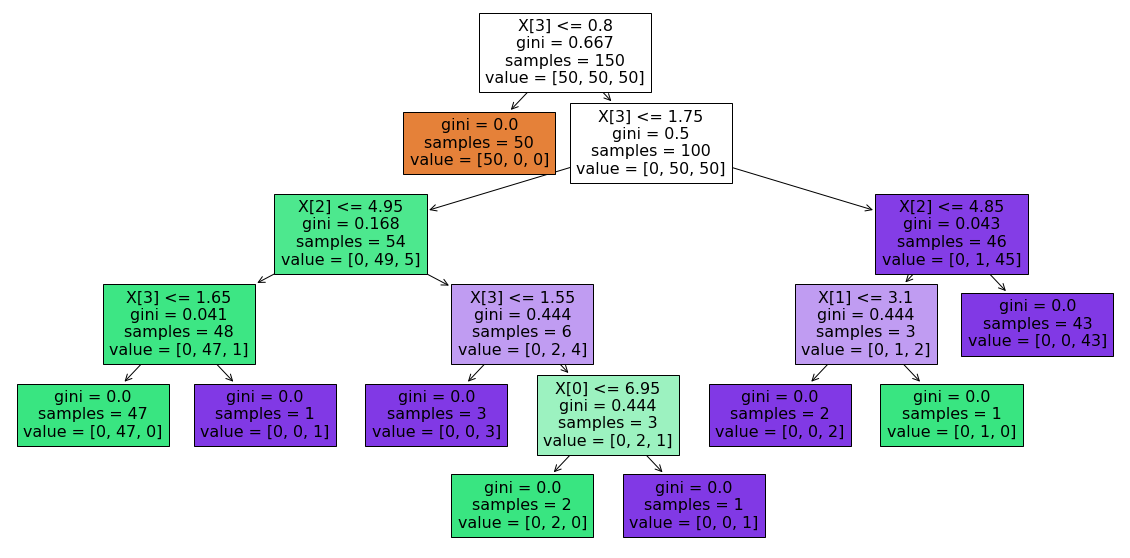

In [ ]:
# Apply the decision tree classifier model to the data using all four parameters at once.
model_all_params = DecisionTreeClassifier().fit(iris.data, iris.target)
# Prepare a plot figure with set size.
plt.figure(figsize = (20,10))
# Plot the decision tree, showing the decisive values and the improvements in Gini impurity along the way.
plot_tree(model_all_params, 
          filled=True      )
# Display the tree plot figure.
plt.show()

As, this is a classification problem, so we make use of a confusion matrix to gauge the accuracy of our model.

In [ ]:
# Seperating the data into dependent and independent variables
X = data1.iloc[:, :-1].values
y = data1.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.6, random_state = 0)

classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('Accuracy is:',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        26
         1.0       0.94      0.97      0.96        33
         2.0       0.97      0.94      0.95        31

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90

[[26  0  0]
 [ 0 32  1]
 [ 0  2 29]]
Accuracy is: 0.9666666666666667


👆Now above we see that it giving approximately 97% which is good number in terms of prediction.